In [185]:
# Подгрузка библиотек
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from sklearn import decomposition
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

from sklearn.datasets import make_blobs

In [186]:
#load data
data = pd.read_csv('./HW/column_3C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [187]:
# Look for types of variables
data.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [188]:
# Look for NA
data.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

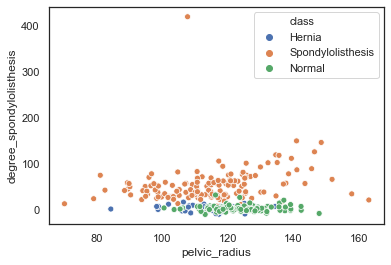

In [8]:
# First look for clusters
sns.scatterplot(x='pelvic_radius',y='degree_spondylolisthesis',hue='class',data=data)

Видим, что Spondy хорошо отделены от Hernia и Normal, а вот последние довольно сильно смешаны, посмотрим может есть пары переменных которые разделяют классы получше.

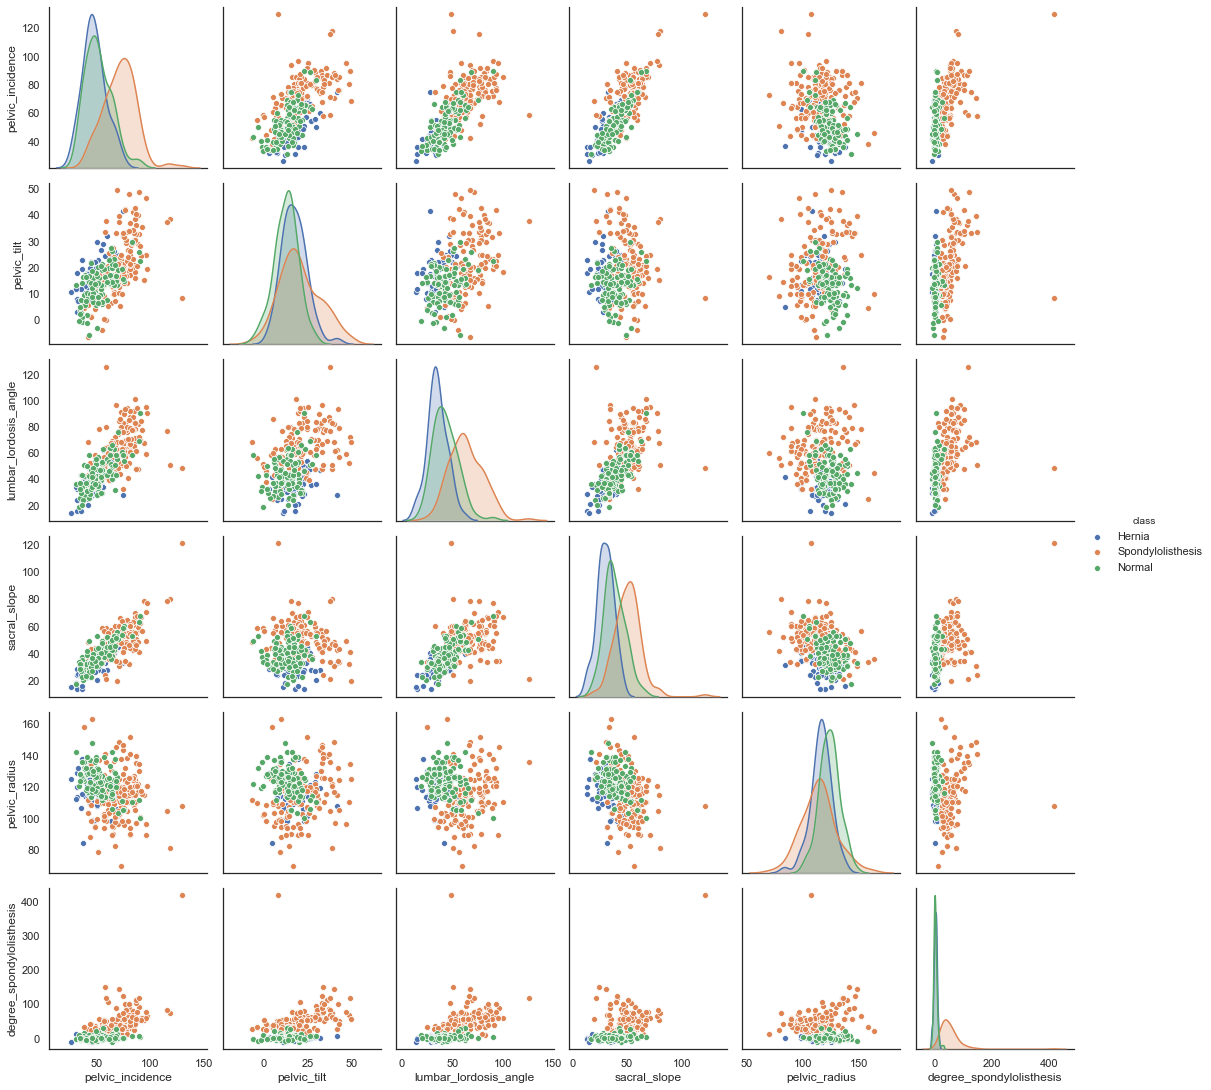

In [30]:
# Посмотрим на все возможные пары переменных
sns.pairplot(data,hue='class')

In [195]:
# Drop class variable
X, y = data.iloc[:,[4,5]].to_numpy(), data[['class']]


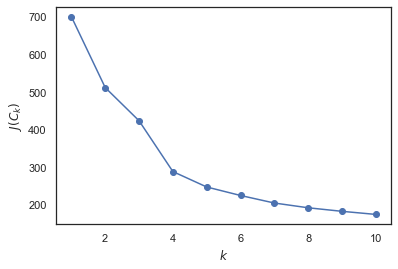

In [196]:
# Look for clusters number
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(np.sqrt(km.inertia_))

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

Оптимальное 4

In [197]:
# Classifire
kmeans = KMeans(n_clusters=4,init='random',n_init=10, max_iter=1000, tol=1e-04, random_state=0).fit(X)
centroids = kmeans.cluster_centers_


IndexError: index 2 is out of bounds for axis 1 with size 2

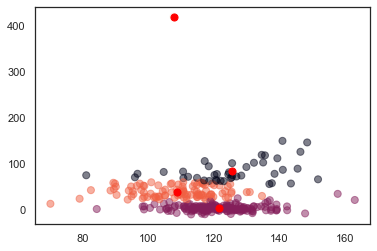

In [199]:
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

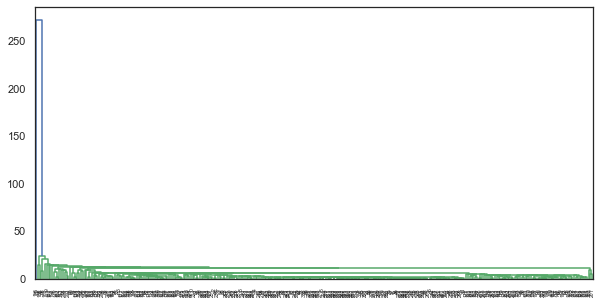

In [200]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
# Строим матрицу расстояний
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма, можно менять параметры на то, что вы хотите
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=30)

Ну как-то не особо

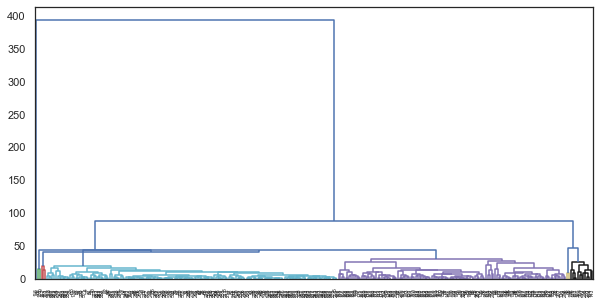

In [201]:
# Строим матрицу расстояний
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'centroid') # linkage — реализация агломеративного алгоритма, можно менять параметры на то, что вы хотите
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=40)

Уже хорошо, но может быть и лучше

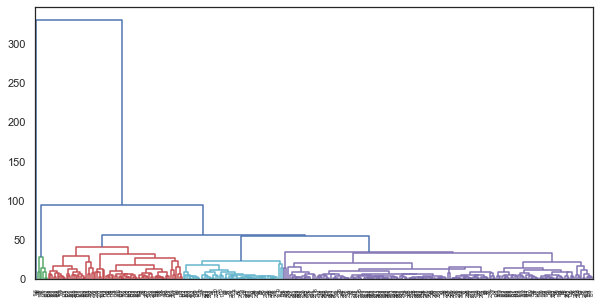

In [202]:
# Строим матрицу расстояний
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'median') # linkage — реализация агломеративного алгоритма, можно менять параметры на то, что вы хотите
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=45)

Это тоже неплохо, но еще не идеально

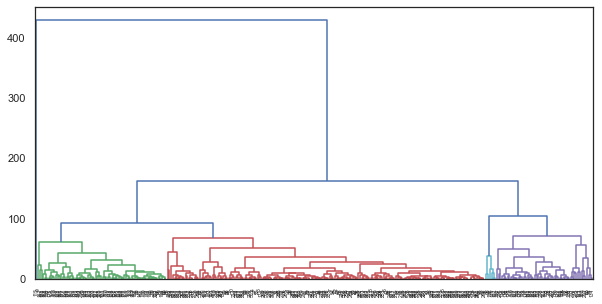

In [229]:
# Строим матрицу расстояний
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'complete') # linkage — реализация агломеративного алгоритма, можно менять параметры на то, что вы хотите
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=80)

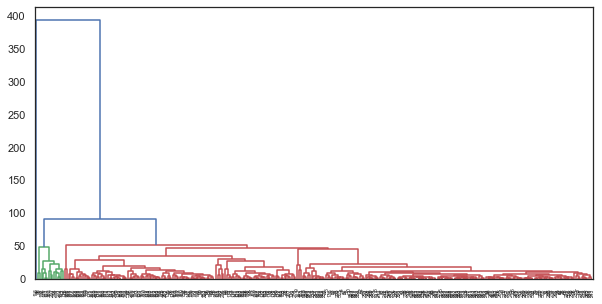

In [230]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
# Строим матрицу расстояний
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'average') # linkage — реализация агломеративного алгоритма, можно менять параметры на то, что вы хотите
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=80)

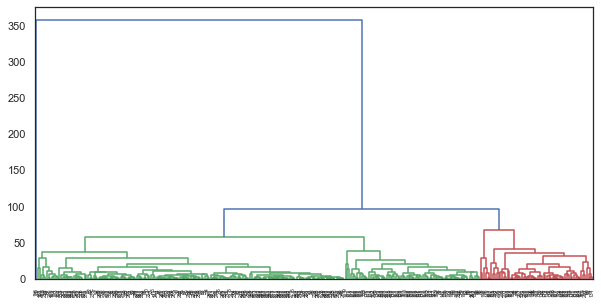

In [232]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
# Строим матрицу расстояний
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'weighted') # linkage — реализация агломеративного алгоритма, можно менять параметры на то, что вы хотите
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=80)

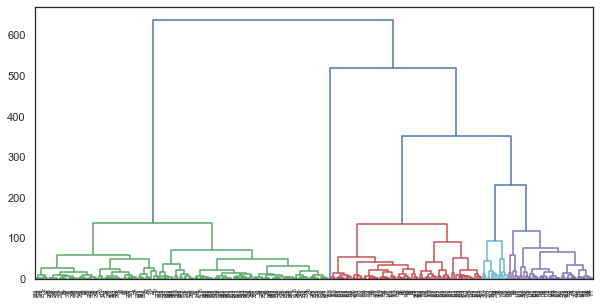

In [227]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
# Строим матрицу расстояний
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма, можно менять параметры на то, что вы хотите
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=150)

Ward это лучше всего кластеризует

In [216]:
# Make y Series
y = pd.Series(y.iloc[:,0])

IndexingError: Too many indexers

In [222]:
# Посмотрим метрики для всех алгоритмов
#Посмотрим на метрики дл всех алгоритмов


algorithms = []
algorithms.append(KMeans(n_clusters=4,init='random',n_init=10, max_iter=1000, tol=1e-04, random_state=0))
algorithms.append(AgglomerativeClustering(n_clusters=4))

data = []
for algo in algorithms:
    algo.fit(X)
#     print(algo.labels_)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI','Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Agglomerative'])
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.421916,0.540640,0.532867,0.557986,0.545137,0.518469
Agglomerative,0.425300,0.569978,0.573571,0.574609,0.574090,0.495829


По этим скорам можно сделать вывод, что для этих данных лучше подходят иерархические методы кластеризации